Binary classification problemi

> Sınıflarımız Cammeo(0) ve Osmancik(1)


In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_excel('/content/drive/MyDrive/Derin Öğrenme/data-1.xlsx') # Veriyi okuma işlemi
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


Elimizde 2 tür pirinç bulunmakta bunlardan bir tanesi Cammeo diğeri Osmancık. Özelliklerimizi kullanarak pirincin türünün ne olduğunu tahmin etmeye çalışacağız.

In [5]:
df.isnull().sum() # Boş değer bulunmuyor.

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [7]:
for i in range(0,df['Class'].count()): # Text olan ifadeleri sayısallaştırdık.
  if df['Class'][i] == 'Cammeo':
    df['Class'] = df['Class'].replace(df['Class'][i],0)
  if df['Class'][i] == 'Osmancik':
    df['Class'] = df['Class'].replace(df['Class'][i],1)

Cammeo değerlerini 0, Osmancik değerlerini 1 ile değiştirdik.

In [8]:
print((df['Class'] == 0).sum(),
(df['Class'] == 1).sum())

1630 2180


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [11]:
X = df.drop(['Class'], axis=1) # Girdiler
Y = df['Class'] # Çıktı

In [12]:
scaler = StandardScaler()

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, random_state=58, test_size=.25) # Veriyi train test olarak ayırma işlemi

In [14]:
Xtrain = scaler.fit_transform(Xtrain) # Ölçeklendirme 
Xtest = scaler.fit_transform(Xtest) 

In [18]:
def modelFunc(optimizer): # Model
  model = Sequential()

  model.add(Dense(8,activation='relu',input_dim=7))
  model.add(BatchNormalization())

  model.add(Dense(16,activation='relu', kernel_regularizer='l2'))
  model.add(BatchNormalization())

  model.add(Dense(8,activation='relu', kernel_regularizer='l2'))
  model.add(BatchNormalization())

  model.add(Dense(1,activation='sigmoid', kernel_regularizer='l2'))

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

  return model

In [20]:
def modelFit(model):
  history = model.fit(Xtrain,Ytrain,batch_size=20,epochs=10, validation_split=0.2)
  return history

In [22]:
def modelEvaluate(model):
  
  test_loss, test_acc = model.evaluate(Xtest,Ytest, batch_size=20)
  print('test acc: {0}, test_loss: {1}'.format(test_acc, test_loss))
  
  print('\n\n')

  y_pred = model.predict(Xtest)
  from sklearn.metrics import confusion_matrix,classification_report

  for i in range(0,len(y_pred)):
    if y_pred[i] >= 0.5:
      y_pred[i] = 1
    else:
      y_pred[i] = 0

  confusion = confusion_matrix(Ytest, y_pred)
  print('Confusion Matrix: \n',confusion)

  print('\n\n')

  print(classification_report(Ytest,y_pred))

In [19]:
def bestModel():
  rmsprop = modelFunc('rmsprop')
  rmsprop_hist = modelFit(rmsprop)

  print('Optimizer RMSPROP Model\n')
  modelEvaluate(rmsprop)

  print('\nBirinci grafik accuracy değerlerini, ikinci grafik loss değerlerini gösterir.\n')
  
  ax1 = plt.subplot(1,2,1)
  ax1.plot(rmsprop_hist.history['acc'], color='red')
  ax1.plot(rmsprop_hist.history['val_acc'], color='blue')
  ax1.legend(['train','validation'])
  
  ax2 = plt.subplot(1,2,2)
  ax2.plot(rmsprop_hist.history['loss'], color='red')
  ax2.plot(rmsprop_hist.history['val_loss'], color='blue')
  ax2.legend(['train','validation'])
  

Epoch 1/10
115/115 [==============================] - 2s 7ms/step - loss: 0.7662 - acc: 0.7514 - val_loss: 0.6706 - val_acc: 0.9108
Epoch 2/10
115/115 [==============================] - 1s 6ms/step - loss: 0.4790 - acc: 0.8993 - val_loss: 0.4497 - val_acc: 0.9248
Epoch 3/10
115/115 [==============================] - 1s 6ms/step - loss: 0.4213 - acc: 0.9068 - val_loss: 0.3606 - val_acc: 0.9283
Epoch 4/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3974 - acc: 0.8954 - val_loss: 0.3236 - val_acc: 0.9318
Epoch 5/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3781 - acc: 0.9033 - val_loss: 0.3066 - val_acc: 0.9371
Epoch 6/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3571 - acc: 0.9081 - val_loss: 0.2878 - val_acc: 0.9353
Epoch 7/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3449 - acc: 0.9068 - val_loss: 0.2831 - val_acc: 0.9353
Epoch 8/10
115/115 [==============================] - 1s 6ms/step - loss: 0.

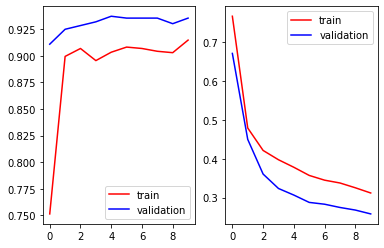

In [23]:
bestModel()

In [24]:
adam = modelFunc('adam')
adamax = modelFunc('adamax')
rmsprop = modelFunc('rmsprop')
sgd = modelFunc('sgd')
adadelta = modelFunc('adadelta')
adagrad = modelFunc('adagrad')
ftrl = modelFunc('ftrl')
nadam = modelFunc('nadam')

In [25]:
adam_hist = modelFit(adam)

Epoch 1/10
115/115 [==============================] - 2s 6ms/step - loss: 0.6492 - acc: 0.8267 - val_loss: 0.7017 - val_acc: 0.9196
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4726 - acc: 0.9059 - val_loss: 0.4371 - val_acc: 0.9318
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4176 - acc: 0.9063 - val_loss: 0.3650 - val_acc: 0.9336
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3913 - acc: 0.9116 - val_loss: 0.3300 - val_acc: 0.9388
Epoch 5/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3723 - acc: 0.9077 - val_loss: 0.3153 - val_acc: 0.9318
Epoch 6/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3424 - acc: 0.9094 - val_loss: 0.2959 - val_acc: 0.9353
Epoch 7/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3338 - acc: 0.9129 - val_loss: 0.2815 - val_acc: 0.9318
Epoch 8/10
115/115 [==============================] - 1s 5ms/step - loss: 0.

In [26]:
adamax_hist = modelFit(adamax)

Epoch 1/10
115/115 [==============================] - 2s 7ms/step - loss: 0.6030 - acc: 0.8460 - val_loss: 0.6523 - val_acc: 0.8934
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 0.5038 - acc: 0.8871 - val_loss: 0.5018 - val_acc: 0.9161
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4604 - acc: 0.8963 - val_loss: 0.4263 - val_acc: 0.9196
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4269 - acc: 0.9059 - val_loss: 0.3919 - val_acc: 0.9301
Epoch 5/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4316 - acc: 0.8967 - val_loss: 0.3717 - val_acc: 0.9353
Epoch 6/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4199 - acc: 0.9055 - val_loss: 0.3597 - val_acc: 0.9353
Epoch 7/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3864 - acc: 0.9138 - val_loss: 0.3469 - val_acc: 0.9371
Epoch 8/10
115/115 [==============================] - 1s 5ms/step - loss: 0.

In [27]:
rmsprop_hist = modelFit(rmsprop)

Epoch 1/10
115/115 [==============================] - 2s 7ms/step - loss: 0.6705 - acc: 0.7930 - val_loss: 0.6545 - val_acc: 0.9196
Epoch 2/10
115/115 [==============================] - 1s 6ms/step - loss: 0.4586 - acc: 0.9002 - val_loss: 0.4522 - val_acc: 0.9318
Epoch 3/10
115/115 [==============================] - 1s 6ms/step - loss: 0.4074 - acc: 0.9133 - val_loss: 0.3641 - val_acc: 0.9336
Epoch 4/10
115/115 [==============================] - 1s 10ms/step - loss: 0.3868 - acc: 0.9059 - val_loss: 0.3264 - val_acc: 0.9371
Epoch 5/10
115/115 [==============================] - 1s 7ms/step - loss: 0.3597 - acc: 0.9085 - val_loss: 0.3069 - val_acc: 0.9353
Epoch 6/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3481 - acc: 0.9221 - val_loss: 0.2912 - val_acc: 0.9371
Epoch 7/10
115/115 [==============================] - 1s 6ms/step - loss: 0.3392 - acc: 0.9103 - val_loss: 0.2833 - val_acc: 0.9336
Epoch 8/10
115/115 [==============================] - 1s 6ms/step - loss: 0

In [28]:
sgd_hist = modelFit(sgd)

Epoch 1/10
115/115 [==============================] - 2s 6ms/step - loss: 0.7022 - acc: 0.7803 - val_loss: 0.6963 - val_acc: 0.9091
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 0.5257 - acc: 0.8985 - val_loss: 0.5178 - val_acc: 0.9283
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4770 - acc: 0.9037 - val_loss: 0.4360 - val_acc: 0.9353
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4478 - acc: 0.9090 - val_loss: 0.3979 - val_acc: 0.9371
Epoch 5/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4345 - acc: 0.9059 - val_loss: 0.3779 - val_acc: 0.9406
Epoch 6/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4367 - acc: 0.9046 - val_loss: 0.3701 - val_acc: 0.9441
Epoch 7/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4137 - acc: 0.9125 - val_loss: 0.3611 - val_acc: 0.9423
Epoch 8/10
115/115 [==============================] - 1s 5ms/step - loss: 0.

In [29]:
adadelta_hist = modelFit(adadelta)

Epoch 1/10
115/115 [==============================] - 2s 6ms/step - loss: 1.4406 - acc: 0.3597 - val_loss: 0.9861 - val_acc: 0.4895
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 1.4272 - acc: 0.3615 - val_loss: 1.1408 - val_acc: 0.3846
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 1.4443 - acc: 0.3492 - val_loss: 1.2885 - val_acc: 0.3601
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 1.4328 - acc: 0.3619 - val_loss: 1.3677 - val_acc: 0.3549
Epoch 5/10
115/115 [==============================] - 1s 5ms/step - loss: 1.4388 - acc: 0.3628 - val_loss: 1.3993 - val_acc: 0.3514
Epoch 6/10
115/115 [==============================] - 1s 6ms/step - loss: 1.4124 - acc: 0.3746 - val_loss: 1.4059 - val_acc: 0.3514
Epoch 7/10
115/115 [==============================] - 1s 8ms/step - loss: 1.4253 - acc: 0.3619 - val_loss: 1.4134 - val_acc: 0.3479
Epoch 8/10
115/115 [==============================] - 1s 8ms/step - loss: 1.

In [30]:
adagrad_hist = modelFit(adagrad)

Epoch 1/10
115/115 [==============================] - 2s 7ms/step - loss: 0.7254 - acc: 0.7689 - val_loss: 0.7565 - val_acc: 0.8339
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6591 - acc: 0.8306 - val_loss: 0.6625 - val_acc: 0.8706
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6226 - acc: 0.8538 - val_loss: 0.6025 - val_acc: 0.8969
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6023 - acc: 0.8661 - val_loss: 0.5595 - val_acc: 0.9073
Epoch 5/10
115/115 [==============================] - 1s 5ms/step - loss: 0.5918 - acc: 0.8726 - val_loss: 0.5349 - val_acc: 0.9143
Epoch 6/10
115/115 [==============================] - 1s 5ms/step - loss: 0.5767 - acc: 0.8796 - val_loss: 0.5208 - val_acc: 0.9161
Epoch 7/10
115/115 [==============================] - 1s 5ms/step - loss: 0.5620 - acc: 0.8871 - val_loss: 0.5105 - val_acc: 0.9178
Epoch 8/10
115/115 [==============================] - 1s 5ms/step - loss: 0.

In [31]:
ftrl_hist = modelFit(ftrl)

Epoch 1/10
115/115 [==============================] - 2s 7ms/step - loss: 0.7033 - acc: 0.6827 - val_loss: 0.7047 - val_acc: 0.5612
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6846 - acc: 0.8236 - val_loss: 0.7042 - val_acc: 0.5612
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6745 - acc: 0.8766 - val_loss: 0.7025 - val_acc: 0.5612
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6682 - acc: 0.8814 - val_loss: 0.6955 - val_acc: 0.6346
Epoch 5/10
115/115 [==============================] - 1s 6ms/step - loss: 0.6624 - acc: 0.8958 - val_loss: 0.6790 - val_acc: 0.9073
Epoch 6/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6575 - acc: 0.9015 - val_loss: 0.6609 - val_acc: 0.9248
Epoch 7/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6529 - acc: 0.9050 - val_loss: 0.6482 - val_acc: 0.9283
Epoch 8/10
115/115 [==============================] - 1s 5ms/step - loss: 0.

In [32]:
nadam_hist = modelFit(nadam)

Epoch 1/10
115/115 [==============================] - 3s 9ms/step - loss: 0.6418 - acc: 0.8376 - val_loss: 0.6280 - val_acc: 0.8899
Epoch 2/10
115/115 [==============================] - 1s 7ms/step - loss: 0.4701 - acc: 0.9059 - val_loss: 0.4471 - val_acc: 0.9301
Epoch 3/10
115/115 [==============================] - 1s 7ms/step - loss: 0.4231 - acc: 0.9112 - val_loss: 0.3722 - val_acc: 0.9423
Epoch 4/10
115/115 [==============================] - 1s 7ms/step - loss: 0.3862 - acc: 0.9107 - val_loss: 0.3414 - val_acc: 0.9371
Epoch 5/10
115/115 [==============================] - 1s 7ms/step - loss: 0.3754 - acc: 0.9103 - val_loss: 0.3166 - val_acc: 0.9388
Epoch 6/10
115/115 [==============================] - 1s 7ms/step - loss: 0.3574 - acc: 0.9142 - val_loss: 0.2986 - val_acc: 0.9388
Epoch 7/10
115/115 [==============================] - 1s 7ms/step - loss: 0.3352 - acc: 0.9239 - val_loss: 0.2816 - val_acc: 0.9388
Epoch 8/10
115/115 [==============================] - 1s 7ms/step - loss: 0.

In [33]:
def plotAcc(adam,adamax,rmsprop,sgd,adadelta,adagrad,ftrl,nadam,adam_text,adamax_text,rmsprop_text,sgd_text,adadelta_text,adagrad_text,ftrl_text,nadam_text):
    plt.ylabel('Validation Acc')
    plt.xlabel('Epochs')
    plt.plot(adam.history['val_acc'], color='blue')
    plt.plot(adamax.history['val_acc'], color='orange')
    plt.plot(rmsprop.history['val_acc'], color='black')
    plt.plot(sgd.history['val_acc'], color='green')
    plt.plot(adadelta.history['val_acc'], color='red')
    plt.plot(adagrad.history['val_acc'], color='purple')
    plt.plot(adadelta.history['val_acc'], color='gray')
    plt.plot(adagrad.history['val_acc'], color='pink')
    plt.legend([adam_text,adamax_text,rmsprop_text,sgd_text,adadelta_text,adagrad_text,ftrl_text,nadam_text])
    plt.show()

In [34]:
def plotLoss(adam,adamax,rmsprop,sgd,adadelta,adagrad,ftrl,nadam,adam_text,adamax_text,rmsprop_text,sgd_text,adadelta_text,adagrad_text,ftrl_text,nadam_text):
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.plot(adam.history['loss'], color='blue')
    plt.plot(adamax.history['loss'], color='orange')
    plt.plot(rmsprop.history['loss'], color='black')
    plt.plot(sgd.history['loss'], color='green')
    plt.plot(adadelta.history['loss'], color='red')
    plt.plot(adagrad.history['loss'], color='purple')
    plt.plot(adadelta.history['loss'], color='gray')
    plt.plot(adagrad.history['loss'], color='pink')
    plt.legend([adam_text,adamax_text,rmsprop_text,sgd_text,adadelta_text,adagrad_text,ftrl_text,nadam_text])
    plt.show()

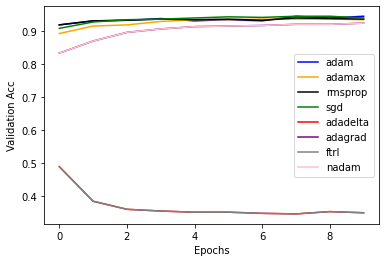

In [35]:
plotAcc(adam_hist,adamax_hist,rmsprop_hist,sgd_hist,adadelta_hist,adagrad_hist,ftrl_hist,nadam_hist,'adam','adamax','rmsprop','sgd','adadelta','adagrad','ftrl','nadam')

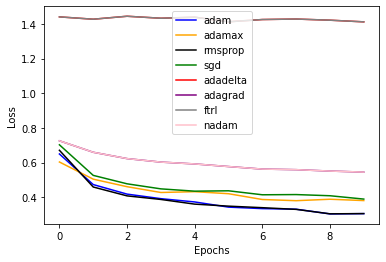

In [36]:
plotLoss(adam_hist,adamax_hist,rmsprop_hist,sgd_hist,adadelta_hist,adagrad_hist,ftrl_hist,nadam_hist,'adam','adamax','rmsprop','sgd','adadelta','adagrad','ftrl','nadam')

In [37]:
print('Optimizer: ADAM Model')
modelEvaluate(adam)

Optimizer: ADAM Model
48/48 [==============================] - 0s 3ms/step - loss: 0.2703 - acc: 0.9244
test acc: 0.92444908618927, test_loss: 0.270274817943573



Confusion Matrix: 
 [[367  33]
 [ 39 514]]



              precision    recall  f1-score   support

           0       0.90      0.92      0.91       400
           1       0.94      0.93      0.93       553

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



In [38]:
print('Optimizer: ADAMAX Model')
modelEvaluate(adamax)

Optimizer: ADAMAX Model
48/48 [==============================] - 0s 2ms/step - loss: 0.3336 - acc: 0.9255
test acc: 0.9254984259605408, test_loss: 0.3335515856742859



Confusion Matrix: 
 [[364  36]
 [ 35 518]]



              precision    recall  f1-score   support

           0       0.91      0.91      0.91       400
           1       0.94      0.94      0.94       553

    accuracy                           0.93       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.93      0.93      0.93       953



In [39]:
print('Optimizer: RMSPROP Model')
modelEvaluate(rmsprop)

Optimizer: RMSPROP Model
48/48 [==============================] - 0s 2ms/step - loss: 0.2751 - acc: 0.9234
test acc: 0.923399806022644, test_loss: 0.27507591247558594



Confusion Matrix: 
 [[372  28]
 [ 45 508]]



              precision    recall  f1-score   support

           0       0.89      0.93      0.91       400
           1       0.95      0.92      0.93       553

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



In [40]:
print('Optimizer: SGD Model')
modelEvaluate(sgd)

Optimizer: SGD Model
48/48 [==============================] - 0s 3ms/step - loss: 0.3517 - acc: 0.9234
test acc: 0.923399806022644, test_loss: 0.35173895955085754



Confusion Matrix: 
 [[367  33]
 [ 40 513]]



              precision    recall  f1-score   support

           0       0.90      0.92      0.91       400
           1       0.94      0.93      0.93       553

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



In [42]:
print('Optimizer: ADAGRAD Model')
modelEvaluate(adagrad)

Optimizer: ADAGRAD Model
48/48 [==============================] - 0s 2ms/step - loss: 0.5031 - acc: 0.9119
test acc: 0.9118573069572449, test_loss: 0.503075122833252



Confusion Matrix: 
 [[338  62]
 [ 22 531]]



              precision    recall  f1-score   support

           0       0.94      0.84      0.89       400
           1       0.90      0.96      0.93       553

    accuracy                           0.91       953
   macro avg       0.92      0.90      0.91       953
weighted avg       0.91      0.91      0.91       953



In [43]:
print('Optimizer: FTRL Model')
modelEvaluate(ftrl)

Optimizer: FTRL Model
48/48 [==============================] - 0s 2ms/step - loss: 0.6331 - acc: 0.9224
test acc: 0.9223504662513733, test_loss: 0.6330721378326416



Confusion Matrix: 
 [[359  41]
 [ 33 520]]



              precision    recall  f1-score   support

           0       0.92      0.90      0.91       400
           1       0.93      0.94      0.93       553

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



In [44]:
print('Optimizer: NADAM Model')
modelEvaluate(nadam)

Optimizer: NADAM Model
48/48 [==============================] - 0s 2ms/step - loss: 0.2737 - acc: 0.9192
test acc: 0.9192025065422058, test_loss: 0.2737010717391968



Confusion Matrix: 
 [[358  42]
 [ 35 518]]



              precision    recall  f1-score   support

           0       0.91      0.90      0.90       400
           1       0.93      0.94      0.93       553

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



In [41]:
print('Optimizer: ADADELTA Model')
modelEvaluate(adadelta)

Optimizer: ADADELTA Model
48/48 [==============================] - 0s 3ms/step - loss: 1.4344 - acc: 0.3778
test acc: 0.37775444984436035, test_loss: 1.434383511543274



Confusion Matrix: 
 [[201 199]
 [394 159]]



              precision    recall  f1-score   support

           0       0.34      0.50      0.40       400
           1       0.44      0.29      0.35       553

    accuracy                           0.38       953
   macro avg       0.39      0.40      0.38       953
weighted avg       0.40      0.38      0.37       953

